In [19]:
# Importing needed libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the CSV file
file_path = 'D:/kaggle-cmi-detect-behavior-with-sensor-data/cmi-detect-behavior-with-sensor-data/train.csv'

# Reading the CSV file
df_original_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe, we will be doing this as checking step every step along the way
df_original_data.head()

,row_id,sequence_type,sequence_id,sequence_counter,subject,orientation,behavior,phase,gesture,acc_x,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
0,SEQ_000007_000000,Target,SEQ_000007,0,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.683594,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,SEQ_000007_000001,Target,SEQ_000007,1,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.949219,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,SEQ_000007_000002,Target,SEQ_000007,2,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.722656,...,-1.0,-1.0,112.0,119.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,SEQ_000007_000003,Target,SEQ_000007,3,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,6.601562,...,-1.0,-1.0,101.0,111.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,SEQ_000007_000004,Target,SEQ_000007,4,SUBJ_059520,Seated Lean Non Dom - FACE DOWN,Relaxes and moves hand to target location,Transition,Cheek - pinch skin,5.566406,...,-1.0,-1.0,101.0,109.0,125.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [20]:
# Checking the number of rows and columns in our dataset
df_original_data.shape

(574945, 341)

In [27]:
# Checking data types of each feature / column
df_original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574945 entries, 0 to 574944
Columns: 341 entries, row_id to tof_5_v63
dtypes: float64(332), int64(1), object(8)
memory usage: 1.5+ GB


In [21]:
# Checking number of unique values in each column
df_original_data.describe()

,sequence_counter,acc_x,acc_y,acc_z,rot_w,rot_x,rot_y,rot_z,thm_1,thm_2,...,tof_5_v54,tof_5_v55,tof_5_v56,tof_5_v57,tof_5_v58,tof_5_v59,tof_5_v60,tof_5_v61,tof_5_v62,tof_5_v63
count,574945.000000,574945.000000,574945.000000,574945.000000,571253.000000,571253.000000,571253.000000,571253.000000,567958.000000,567307.000000,...,544803.000000,544803.000000,544803.000000,544803.000000,544803.000000,544803.000000,544803.000000,544803.000000,544803.000000,544803.000000
mean,43.645234,1.639980,1.790704,-0.459811,0.360375,-0.119916,-0.059953,-0.188298,27.076450,27.133483,...,29.395651,26.030826,45.342583,43.074842,40.045908,37.631707,34.977928,31.934330,29.024752,27.320358
std,45.717673,5.781259,5.003945,6.096490,0.225739,0.465520,0.543028,0.504137,3.231948,2.941438,...,58.093844,54.215523,68.466064,68.017631,66.941587,65.288710,63.201604,60.440645,57.218513,55.407192
min,0.000000,-34.585938,-24.402344,-42.855469,0.000000,-0.999146,-0.999695,-0.998169,-0.370413,21.958820,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,17.000000,-2.964844,-2.121094,-5.417969,0.180237,-0.456299,-0.511536,-0.627686,24.753527,24.543737,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,35.000000,2.972656,0.695312,-1.562500,0.340332,-0.186890,-0.112610,-0.263916,26.982324,26.354338,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,54.000000,6.343750,6.816406,5.164062,0.503479,0.204590,0.440063,0.251099,29.425036,29.620147,...,34.000000,24.000000,81.000000,76.000000,67.000000,59.000000,51.000000,42.000000,35.000000,31.000000
max,699.000000,46.328125,27.183594,30.078125,0.999390,0.999817,0.999451,0.999878,38.457664,37.578339,...,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000


In [22]:
# Checking number of null values in each column
df_original_data.isnull().sum()

row_id                  0
sequence_type           0
sequence_id             0
sequence_counter        0
subject                 0
                    ...  
tof_5_v59           30142
tof_5_v60           30142
tof_5_v61           30142
tof_5_v62           30142
tof_5_v63           30142
Length: 341, dtype: int64

In [43]:
# EDA START

In [37]:
# EDA each column is analysed by order of importance 
# First the column ‘row_id’ is analysed, luckily that column does not contain any null values.

row_id = df_original_data['row_id'].value_counts()
print(row_id)

row_id
SEQ_000007_000000    1
SEQ_043696_000001    1
SEQ_043695_000047    1
SEQ_043695_000048    1
SEQ_043695_000049    1
                    ..
SEQ_021590_000005    1
SEQ_021590_000004    1
SEQ_021590_000003    1
SEQ_021590_000002    1
SEQ_065531_000052    1
Name: count, Length: 574945, dtype: int64


In [39]:
# To show data type of 'row_id' variable defined above
type(row_id)

pandas.core.series.Series

In [41]:
# Next the column ‘sequence_type’ is analysed, luckily that column does not contain any null values.

sequence_type = df_original_data['sequence_type'].value_counts()
print(sequence_type)

sequence_type
Target        344058
Non-Target    230887
Name: count, dtype: int64


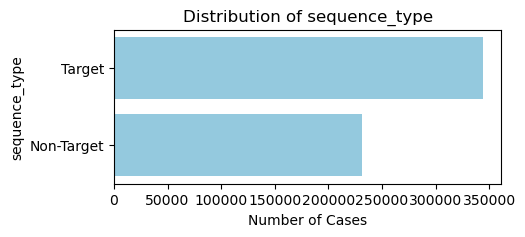

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(5, 2))
sns.barplot(x=sequence_type.values, y=sequence_type.index, color='skyblue')

# Labels and title
plt.xlabel("Number of Cases")
plt.ylabel("sequence_type")
plt.title("Distribution of sequence_type")
plt.show()

In [81]:
# To show data type of 'sequence_type' variable defined above
type(sequence_type)

pandas.core.series.Series

In [57]:
# Next the column ‘sequence_id’ is analysed, luckily that column does not contain any null values.

sequence_id = df_original_data['sequence_id'].value_counts()
print(sequence_id)

sequence_id
SEQ_015261    700
SEQ_014205    671
SEQ_028188    647
SEQ_060593    630
SEQ_016031    567
             ... 
SEQ_011271     34
SEQ_032114     34
SEQ_059162     34
SEQ_022667     34
SEQ_009199     29
Name: count, Length: 8151, dtype: int64


In [61]:
# To show data type of 'sequence_id' variable defined above
type(sequence_type)

pandas.core.series.Series

In [65]:
# Next the column ‘sequence_counter’ is analysed, luckily that column does not contain any null values.

sequence_counter = df_original_data['sequence_counter'].value_counts()
print(sequence_counter)

sequence_counter
0      8151
15     8151
28     8151
27     8151
26     8151
       ... 
674       1
673       1
672       1
671       1
699       1
Name: count, Length: 700, dtype: int64


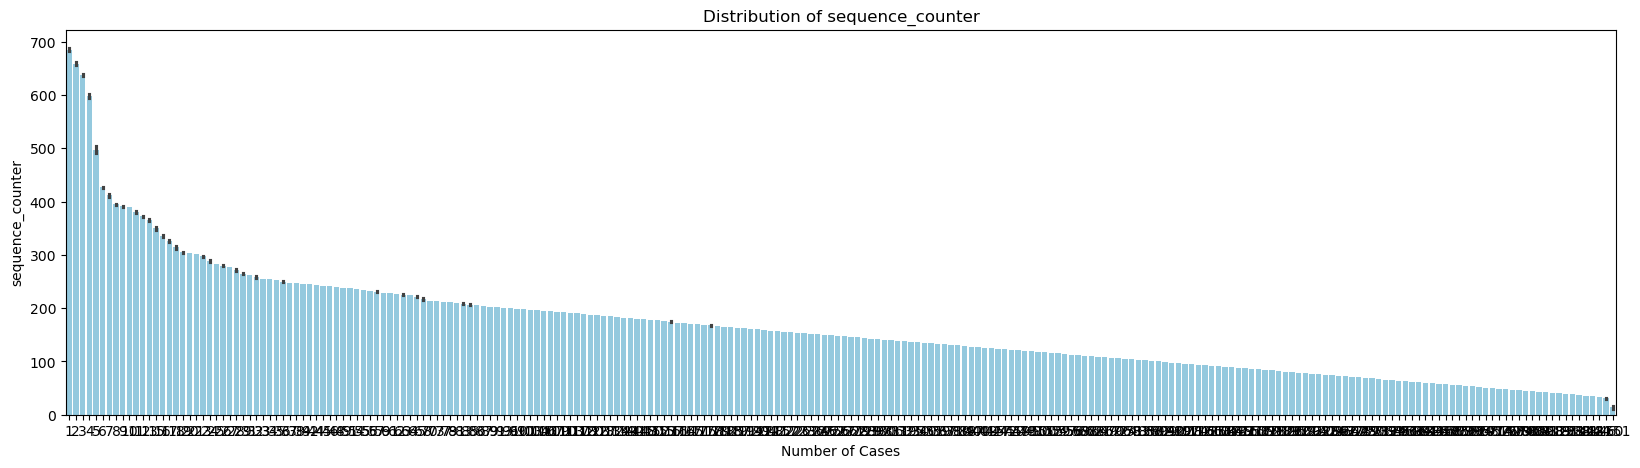

In [79]:
# Plot
plt.figure(figsize=(20, 5))
sns.barplot(x=sequence_counter.values, y=sequence_counter.index, color='skyblue')

# Labels and title
plt.xlabel("Number of Cases")
plt.ylabel("sequence_counter")
plt.title("Distribution of sequence_counter")
plt.show()

In [83]:
# To show data type of 'sequence_id' variable defined above
type(sequence_counter)

pandas.core.series.Series

In [85]:
# Next the column ‘subject’ is analysed, luckily that column does not contain any null values.

subject = df_original_data['subject'].value_counts()
print(subject)

subject
SUBJ_040733    10848
SUBJ_052342    10393
SUBJ_023739     9154
SUBJ_059520     8947
SUBJ_058967     8718
               ...  
SUBJ_032233     6027
SUBJ_040310     5925
SUBJ_045235     5866
SUBJ_036405     4310
SUBJ_053217     4008
Name: count, Length: 81, dtype: int64


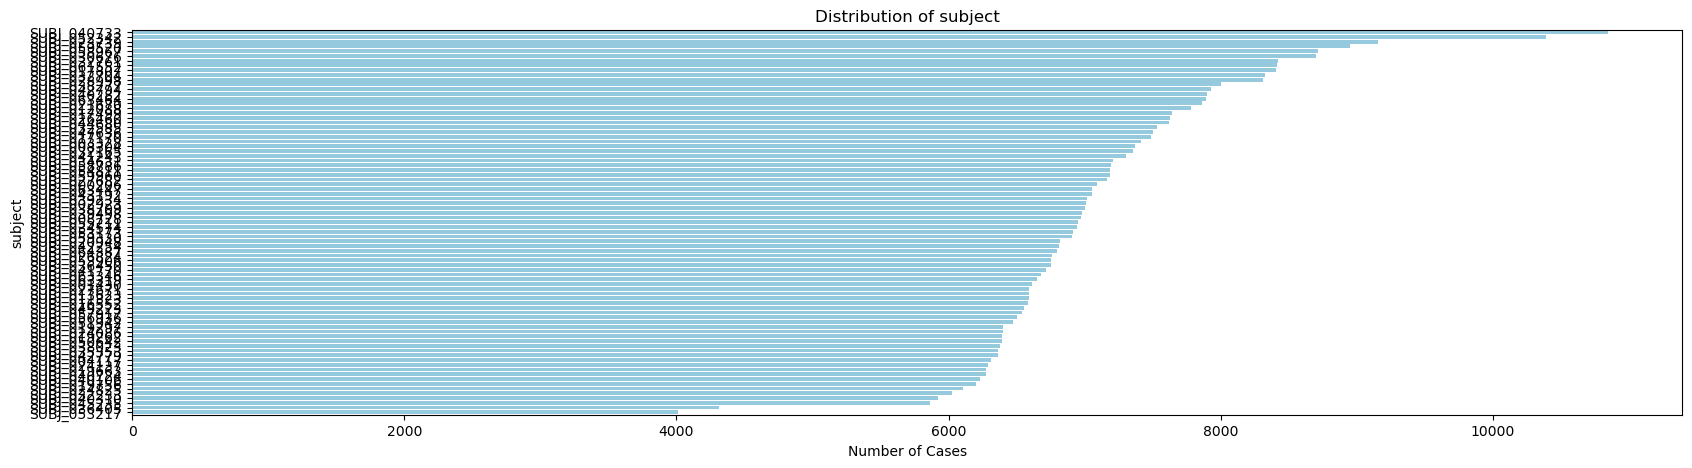

In [87]:
# Plot
plt.figure(figsize=(20, 5))
sns.barplot(x=subject.values, y=subject.index, color='skyblue')

# Labels and title
plt.xlabel("Number of Cases")
plt.ylabel("subject")
plt.title("Distribution of subject")
plt.show()

In [91]:
# To show data type of 'sequence_id' variable defined above
type(subject)

pandas.core.series.Series

In [97]:
# Next the column ‘orientation’ is analysed, luckily that column does not contain any null values.

orientation = df_original_data['orientation'].value_counts()
print(orientation)

orientation
Seated Straight                    188120
Seated Lean Non Dom - FACE DOWN    131636
Lie on Back                        130043
Lie on Side - Non Dominant         125146
Name: count, dtype: int64


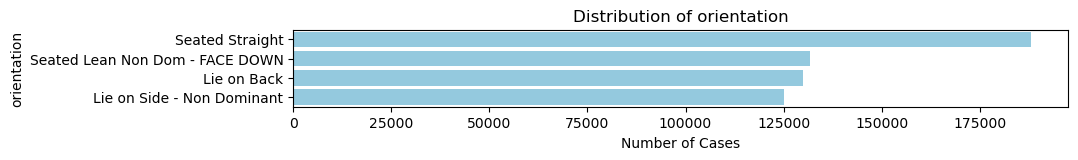

In [109]:
# Plot
plt.figure(figsize=(10, 1))
sns.barplot(x=orientation.values, y=orientation.index, color='skyblue')

# Labels and title
plt.xlabel("Number of Cases")
plt.ylabel("orientation")
plt.title("Distribution of orientation")
plt.show()

In [111]:
# To show data type of 'orientation' variable defined above
type(orientation)

pandas.core.series.Series

In [113]:
# Next the column ‘behavior’ is analysed, luckily that column does not contain any null values.

behavior = df_original_data['behavior'].value_counts()
print(behavior)

behavior
Performs gesture                             255817
Moves hand to target location                156474
Hand at target location                       95173
Relaxes and moves hand to target location     67481
Name: count, dtype: int64


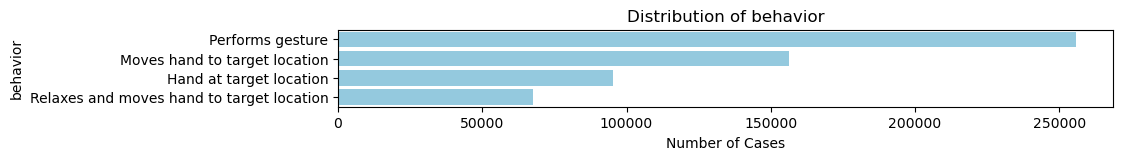

In [115]:
# Plot
plt.figure(figsize=(10, 1))
sns.barplot(x=behavior.values, y=behavior.index, color='skyblue')

# Labels and title
plt.xlabel("Number of Cases")
plt.ylabel("behavior")
plt.title("Distribution of behavior")
plt.show()

In [117]:
# To show data type of 'behavior' variable defined above
type(behavior)

pandas.core.series.Series

In [119]:
# Next the column ‘phase’ is analysed, luckily that column does not contain any null values.

phase = df_original_data['phase'].value_counts()
print(phase)

phase
Transition    319128
Gesture       255817
Name: count, dtype: int64


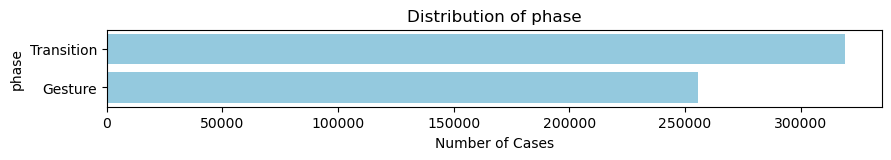

In [121]:
# Plot
plt.figure(figsize=(10, 1))
sns.barplot(x=phase.values, y=phase.index, color='skyblue')

# Labels and title
plt.xlabel("Number of Cases")
plt.ylabel("phase")
plt.title("Distribution of phase")
plt.show()

In [123]:
# To show data type of 'behavior' variable defined above
type(phase)

pandas.core.series.Series

In [125]:
# Next the column ‘gesture’ is analysed, luckily that column does not contain any null values.

gesture = df_original_data['gesture'].value_counts()
print(gesture)

gesture
Text on phone                                 58462
Neck - scratch                                56619
Eyebrow - pull hair                           44305
Forehead - scratch                            40923
Forehead - pull hairline                      40802
Above ear - pull hair                         40560
Neck - pinch skin                             40507
Eyelash - pull hair                           40218
Cheek - pinch skin                            40124
Wave hello                                    34356
Write name in air                             31267
Pull air toward your face                     30743
Feel around in tray and pull out an object    17114
Glasses on/off                                13542
Drink from bottle/cup                         13093
Scratch knee/leg skin                         12328
Write name on leg                             10138
Pinch knee/leg skin                            9844
Name: count, dtype: int64


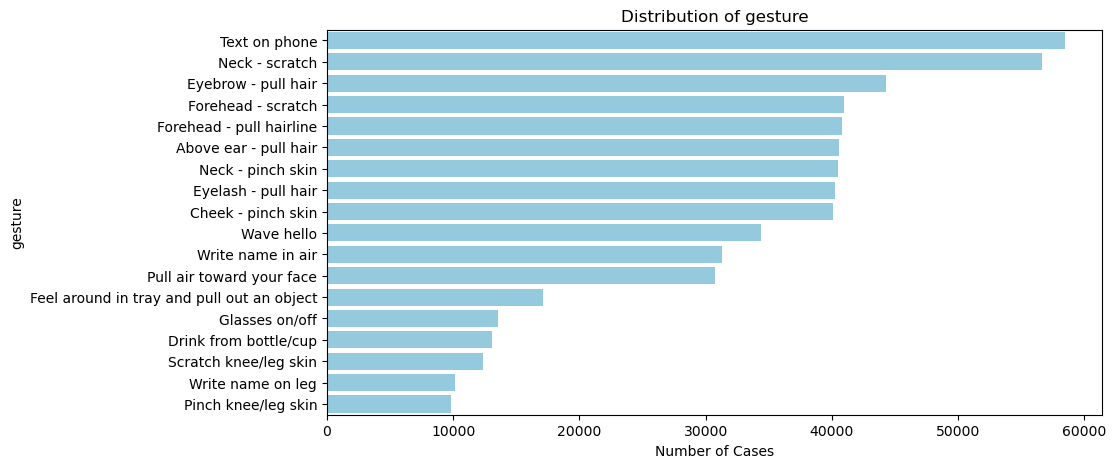

In [127]:
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=gesture.values, y=gesture.index, color='skyblue')

# Labels and title
plt.xlabel("Number of Cases")
plt.ylabel("gesture")
plt.title("Distribution of gesture")
plt.show()

In [129]:
# To show data type of 'gesture' variable defined above
type(gesture)

pandas.core.series.Series

In [131]:
# EDA END